In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from astropy.table import Table as Tb
%matplotlib notebook

In [3]:
from scipy import stats
import numpy as np

In [4]:
df = pd.read_excel("0801_1000Microns_TwoSensors.xlsx")
df

,Cap. Bridge (bit),Voltage steps,V(PZT),V(PZT).1,Voltage diff.,real_V,CH1 M-E Sensor,CH1 ME_D,ME_A_dis_CH1,CH2 M-E Sensor,CH2 ME_D,ME_A_dis_CH2,Fringes,Fringe_D,fringe_A_dis,Time
0,NaN,NaN,(before code)(monitor),(after code)(monitor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29362.0,NaN,-0.001,0.408,0.409,4.08,1359.07,NaN,NaN,1317.85,NaN,NaN,NaN,NaN,NaN,03:11:00
2,29762.0,400.0,0.425,1.498,1.073,14.98,1365.66,6.59,6.59,1324.32,6.47,6.47,20.0,6.3280,6.3280,03:17:00
3,30162.0,400.0,1.46,2.271,0.811,22.71,1372.21,6.55,13.14,1330.71,6.39,12.86,20.0,6.3280,12.6560,03:19:00
4,30562.0,400.0,2.251,3.028,0.777,30.28,1378.81,6.60,19.74,1337.14,6.43,19.29,21.0,6.6444,19.3004,03:21:00
5,30962.0,400.0,2.987,3.793,0.806,37.93,1385.48,6.67,26.41,1343.63,6.49,25.78,23.0,7.2772,26.5776,03:24:00
6,31362.0,400.0,3.734,4.51,0.776,45.10,1392.17,6.69,33.10,1350.14,6.51,32.29,21.0,6.6444,33.2220,03:26:00
7,31762.0,400.0,4.45,5.22,0.770,52.20,1398.90,6.73,39.83,1356.68,6.54,38.83,22.0,6.9608,40.1828,03:28:00
8,32162.0,400.0,5.11,5.91,0.800,59.10,1405.64,6.74,46.57,1363.25,6.57,45.40,19.0,6.0116,46.1944,03:31:00
9,32562.0,400.0,5.85,6.64,0.790,66.40,1412.41,6.77,53.34,1369.84,6.59,51.99,23.0,7.2772,53.4716,03:34:00


In [5]:
#column of sensor 1 (channel 1)
ME_A_dis_CH1 = df["ME_A_dis_CH1"][2:27]
print(ME_A_dis_CH1)

2      6.59
3     13.14
4     19.74
5     26.41
6     33.10
7     39.83
8     46.57
9     53.34
10    60.10
11    68.05
12    76.02
13    68.04
14    60.09
15    53.33
16    46.56
17    39.83
18    33.11
19    26.44
20    19.78
21    13.19
22     6.66
23     0.16
24    -6.29
25   -12.81
26   -20.03
Name: ME_A_dis_CH1, dtype: float64


In [6]:
#column of sensor 2 (channel 2)
ME_A_dis_CH2 = df["ME_A_dis_CH2"][2:27]
print(ME_A_dis_CH2)

2      6.47
3     12.86
4     19.29
5     25.78
6     32.29
7     38.83
8     45.40
9     51.99
10    58.56
11    66.30
12    74.05
13    66.30
14    58.57
15    52.01
16    45.44
17    38.90
18    32.38
19    25.90
20    19.43
21    13.03
22     6.70
23     0.38
24    -5.88
25   -12.22
26   -19.22
Name: ME_A_dis_CH2, dtype: float64


In [7]:
x = ME_A_dis_CH2
y = ME_A_dis_CH1

info_Sensors = stats.linregress(x,y)
info_Sensors

LinregressResult(slope=1.0295365085297474, intercept=-0.19387762550028143, rvalue=0.9999983979296428, pvalue=1.076556556183982e-64, stderr=0.0003842679343973273, intercept_stderr=0.015146388782663597)

<IPython.core.display.Javascript object>


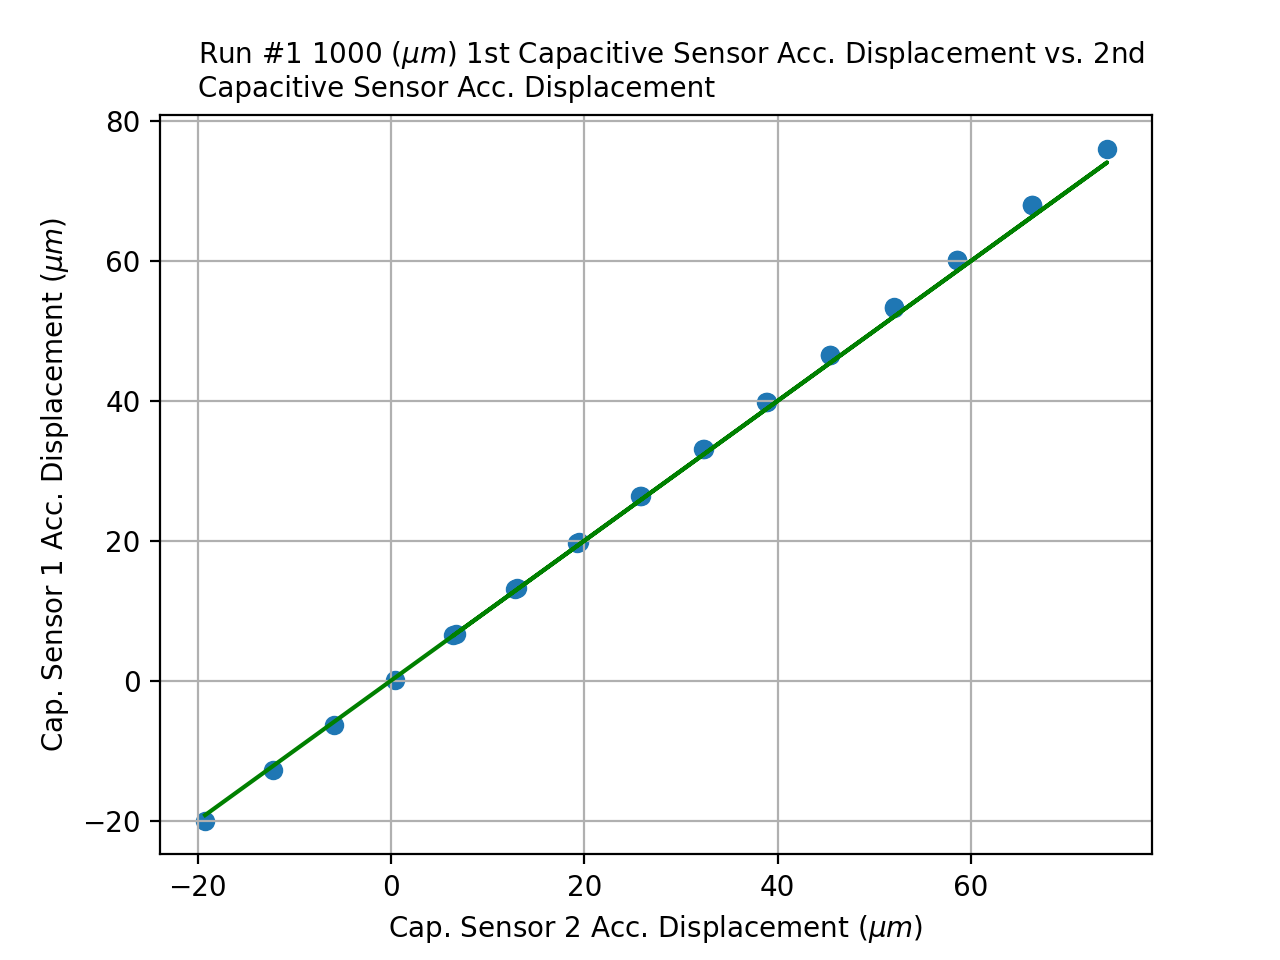

In [8]:
#plot of first sensor vs. second sensor
plt.close("all")

#plot of our reference data, channel 2
plt.plot(x,x,c = "green")


plt.scatter(x,y)


plt.xlabel('Cap. Sensor 2 Acc. Displacement ($\mu m$)')
plt.ylabel('Cap. Sensor 1 Acc. Displacement ($\mu m$)')
t = 'Run #1 1000 ($\mu m$) 1st Capacitive Sensor Acc. Displacement vs. 2nd Capacitive Sensor Acc. Displacement'
plt.text(-20, 84, t, ha='left', rotation=0, wrap=True)


plt.grid()
plt.show

#plt.savefig('Run 1 1000 Microns Two Sensors.pdf')